<a href="https://colab.research.google.com/github/cryssoga/DSWP/blob/master/Notebooks_Li%C3%A7%C3%A3o%20de%20Casa/Exercicio_6_120yearsOlympicHistory_NB10_DATA_TRANSFORMATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NB10__04_3DP_3_Data_Transformation

Para cada um dos dataframes a seguir, aplique os seguintes steps:
*  Padronizar o nome das colunas
*  Eliminar espaços entre os nomes das colunas;
*  Eliminar caracteres especiais dos nomes das colunas;
*  Renomear as colunas com lower() (ou upper());
*  Aplicar a trasformação StandardScaler e MinMaxScaler em cada uma das colunas do dataframe;
*  DataViz - Mostrar a distribuição das colunas para compararmos os resultados antes e depois das transformações.
*  As correlações das colunas mudam com as transformações?

Exercício 6 - 120 years of Olympic history: athletes and results
120 years of Olympic history: athletes and results

Trate adequadamente as variáveis 'sex', 'season', 'team', 'city', 'sport' e 'medal';

Aplique as transformações que acabamos de estudar nos campos/colunas numéricas 'height' e 'weight'. Cuidado com os Missing Values contidos nas variáveis!

Verifique/avalie o impacto dos outliers nestas colunas.

Neste caso, qual transformação é mais adequado diante dos outliers?

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount ('/content/drive')
df_atleta = pd.read_csv('/content/drive/My Drive/dswp/athlete_events.csv')
df_atleta.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
# df_atleta = df_atleta.set_index('ID')

In [ ]:
df_atleta.head()

In [ ]:
df_atleta.info()

In [ ]:
df_atleta.isna().sum()      # Observe que somente 4 colunas apresentan NaNs: 'Age', 'Height', 'Weight' e 'Medal' 

In [ ]:
df_atleta.isna().sum().sum()     # somatória total de NaNs existentes no dataframe

In [ ]:
# Verificar nomes das colunas:
df_atleta.columns

In [ ]:
# Convertendo nomes das colunas para letras minúsculas:
df_atleta.columns = df_atleta.columns.str.lower()
df_atleta.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
# Verificando existência de linhas duplicadas (retorna série booleana)
df_atleta.duplicated()

In [ ]:
# Verificando se tem True:
df_atleta.duplicated().unique()

In [ ]:
# Mostrando quais linhas são as duplicadas para remoção:
df_atleta[df_atleta.duplicated()].sort_values(by='name').head()

In [ ]:
# Verificando quantas linhas duplicadas serão removidas: 1385
df_atleta[df_atleta.duplicated()].info()

In [ ]:
df_atleta.drop_duplicates(inplace=True)

In [ ]:
df_atleta.sort_values(by='name').head()

In [ ]:
(df_atleta.info()

In [ ]:
df_atleta.count(axis=0)

In [ ]:
df_atleta.sex.unique()

In [ ]:
# Aterando na coluna 'sex': 'M' => 0, 'F' => 1
df_atleta['sex'] = df_atleta['sex'].map({'M':0, 'F':1}) 

In [ ]:
df_atleta.head()

In [ ]:
df_atleta.season.unique()

In [ ]:
# Aterando na coluna 'season': 'Summer' => 0, 'Winter' => 1
df_atleta['season'] = df_atleta['season'].map({'Summer':0, 'Winter':1})

In [ ]:
df_atleta.head()

In [ ]:
# Qtde de NaNs na coluna 'medal'
df_atleta.medal.isna().sum()

In [ ]:
df_atleta.medal.unique()

In [ ]:
df_atleta.height.isna().sum()

In [ ]:
df_atleta.weight.isna().sum()

In [ ]:
# Calculando a média de todas as colunas    
df_atleta.mean(axis=0)

In [ ]:
# Verificando as linhas em que se encontram as NaNs da coluna 'height'
df_atleta.height[df_atleta.height.isna()]

In [ ]:
# Criando coluna 'age_1' que recebe os dados da coluna 'age' com NaN's preenchidos com a mediana
df_atleta['age_1'] = df_atleta['age'].fillna(df_atleta['age'].median())
df_atleta.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,age_1
0,1,A Dijiang,0,24.0,180.0,80.0,China,CHN,1992 Summer,1992,0,Barcelona,Basketball,Basketball Men's Basketball,NaN,24.0
1,2,A Lamusi,0,23.0,170.0,60.0,China,CHN,2012 Summer,2012,0,London,Judo,Judo Men's Extra-Lightweight,NaN,23.0
2,3,Gunnar Nielsen Aaby,0,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,0,Antwerpen,Football,Football Men's Football,NaN,24.0
3,4,Edgar Lindenau Aabye,0,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,0,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,34.0
4,5,Christine Jacoba Aaftink,1,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,1,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,21.0


In [ ]:
# Criando coluna 'height_1' que recebe os dados da coluna 'height' com NaN's preenchidos com a mediana
df_atleta['height_1'] = df_atleta['height'].fillna(df_atleta['height'].median())
df_atleta.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,age_1,height_1
0,1,A Dijiang,0,24.0,180.0,80.0,China,CHN,1992 Summer,1992,0,Barcelona,Basketball,Basketball Men's Basketball,NaN,24.0,180.0
1,2,A Lamusi,0,23.0,170.0,60.0,China,CHN,2012 Summer,2012,0,London,Judo,Judo Men's Extra-Lightweight,NaN,23.0,170.0
2,3,Gunnar Nielsen Aaby,0,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,0,Antwerpen,Football,Football Men's Football,NaN,24.0,175.0
3,4,Edgar Lindenau Aabye,0,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,0,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,34.0,175.0
4,5,Christine Jacoba Aaftink,1,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,1,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,21.0,185.0


In [ ]:
# Criando coluna 'weight_1' que recebe os dados da coluna 'weight' com NaN's preenchidos com a mediana
df_atleta['weight_1'] = df_atleta['weight'].fillna(df_atleta['weight'].median())
df_atleta.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,age_1,height_1,weight_1
0,1,A Dijiang,0,24.0,180.0,80.0,China,CHN,1992 Summer,1992,0,Barcelona,Basketball,Basketball Men's Basketball,NaN,24.0,180.0,80.0
1,2,A Lamusi,0,23.0,170.0,60.0,China,CHN,2012 Summer,2012,0,London,Judo,Judo Men's Extra-Lightweight,NaN,23.0,170.0,60.0
2,3,Gunnar Nielsen Aaby,0,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,0,Antwerpen,Football,Football Men's Football,NaN,24.0,175.0,70.0
3,4,Edgar Lindenau Aabye,0,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,0,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,34.0,175.0,70.0
4,5,Christine Jacoba Aaftink,1,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,1,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,21.0,185.0,82.0


In [ ]:
# Conferindo 'age_1' nas linhas  em que 'age' = NaNs
df_atleta[df_atleta['age'].isna()]

In [ ]:
# Criando coluna 'medal_1' que recebe dados da colunaa 'medal' com os NaNs preenchidos com 'no_medal'
df_atleta['medal_1'] = df_atleta['medal'].fillna('no_medal')
df_atleta.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,age_1,height_1,weight_1,medal_1
0,1,A Dijiang,0,24.0,180.0,80.0,China,CHN,1992 Summer,1992,0,Barcelona,Basketball,Basketball Men's Basketball,NaN,24.0,180.0,80.0,no_medal
1,2,A Lamusi,0,23.0,170.0,60.0,China,CHN,2012 Summer,2012,0,London,Judo,Judo Men's Extra-Lightweight,NaN,23.0,170.0,60.0,no_medal
2,3,Gunnar Nielsen Aaby,0,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,0,Antwerpen,Football,Football Men's Football,NaN,24.0,175.0,70.0,no_medal
3,4,Edgar Lindenau Aabye,0,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,0,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,34.0,175.0,70.0,Gold
4,5,Christine Jacoba Aaftink,1,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,1,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,21.0,185.0,82.0,no_medal


In [ ]:
# Substituindo os dados da coluna 'medal_1' com números 1, 2, 3 e 0:
df_atleta['medal_1'] = df_atleta['medal_1'].map({'Gold': 1, 'Silver' : 2, 'Bronze' : 3, 'no_medal': 0.0})

In [ ]:
# tratando colunas 'team', 'city', e 'sport' aplicando LabelEncoder()

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

# df_atleta['team_le'] = le.fit_transform(df_atleta['team'])
# df_atleta['city_le'] = le.fit_transform(df_atleta['city'])
# df_atleta['sport_le'] = le.fit_transform(df_atleta['sport'])

In [ ]:
df_atleta.columns

In [ ]:
len(df_atleta.sport.unique())

In [ ]:
len (df_atleta.noc.unique())

In [ ]:
df_atleta = df_atleta.drop(axis=1, columns={'age', 'height', 'weight', 'medal'})

In [ ]:
df_atleta.head()

In [ ]:
df_atleta.columns

In [ ]:
# df_atleta1 = df_atleta.drop(axis=1, columns={'name','sex','team', 'noc', 'games','year', 'season', 'city', 'sport', 'event', 'age_1', 'medal_1'})
df_atleta_unico = df_atleta.copy()

In [ ]:
df_atleta_unico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269731 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        269731 non-null  int64  
 1   name      269731 non-null  object 
 2   sex       269731 non-null  int64  
 3   team      269731 non-null  object 
 4   noc       269731 non-null  object 
 5   games     269731 non-null  object 
 6   year      269731 non-null  int64  
 7   season    269731 non-null  int64  
 8   city      269731 non-null  object 
 9   sport     269731 non-null  object 
 10  event     269731 non-null  object 
 11  age_1     269731 non-null  float64
 12  height_1  269731 non-null  float64
 13  weight_1  269731 non-null  float64
 14  medal_1   269731 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 32.9+ MB


In [ ]:
# Eliminando linhas com mesmo ID (ficará uma linha por atleta)

df_atleta_unico.drop_duplicates(subset=['id'], inplace = True)

In [ ]:
df_atleta_unico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135571 entries, 0 to 271114
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        135571 non-null  int64  
 1   name      135571 non-null  object 
 2   sex       135571 non-null  int64  
 3   team      135571 non-null  object 
 4   noc       135571 non-null  object 
 5   games     135571 non-null  object 
 6   year      135571 non-null  int64  
 7   season    135571 non-null  int64  
 8   city      135571 non-null  object 
 9   sport     135571 non-null  object 
 10  event     135571 non-null  object 
 11  age_1     135571 non-null  float64
 12  height_1  135571 non-null  float64
 13  weight_1  135571 non-null  float64
 14  medal_1   135571 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 16.5+ MB


In [ ]:
df_atleta1 = df_atleta_unico.drop(axis=1, columns = {'id','name','sex','team', 'noc', 'games','year', 'season', 'city', 'sport', 'event', 'age_1', 'medal_1'})

In [ ]:
df_atleta1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135571 entries, 0 to 271114
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   height_1  135571 non-null  float64
 1   weight_1  135571 non-null  float64
dtypes: float64(2)
memory usage: 3.1 MB


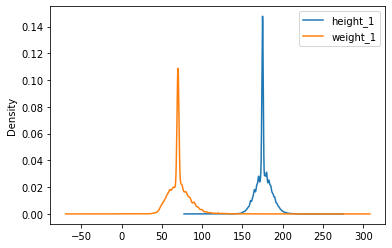

In [ ]:
df_atleta1.plot(kind = 'kde')

In [ ]:
# Aplicar a trasformação StandardScaler e MinMaxScaler nos campos/colunas numéricas 'height' e 'weight'.

In [ ]:
# Transformação 1: StandardScaler 
# (StandardScaler é a transformação que centraliza os dados através da remoção da média (dos dados) e, na sequência,
# redimensiona (scale) através da divisão pelo desvio-padrão. 
# Após a transformação, os dados terão média zero e desvio-padrão 1. 
# Assume que os dados (as colunas a serem transformadas) são normalmente distribuidos ;
# Se os dados não possuem distribuição Normal, então esta não é uma boa transformação a se aplicar.)

import numpy as np
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision = 3)

In [ ]:
# array com as preditoras, da seguinte forma: X = [coluna1, coluna2, ..., colunaN]
# OBSERVAR : A1_scale, A1_scale_transform, A1_scale_fit_transform --> São arrays multidimensionais (do tipo NumPy)!

A1_scale = StandardScaler().fit_transform(df_atleta1) # Combinação dos métodos fit() + transform()

A1_scale_fit = StandardScaler().fit(df_atleta1) # Aplica o fit() separadamente
A1_scale_transform = A1_scale_fit.transform(df_atleta1) # Aplica o transform() separadamente.
A1_scale_fit_transform = StandardScaler().fit(df_atleta1).transform(df_atleta1) # Aplica fit().transform() encadeado


In [ ]:
# convertendo o array A1_scale obtido acima em dataframe:
df_A1_scale = pd.DataFrame(A1_scale, columns = ['height_1', 'weight_1'])

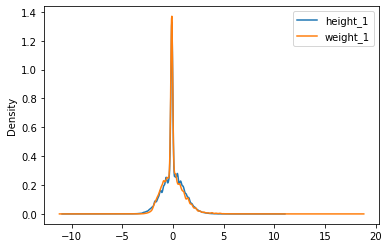

In [ ]:
df_A1_scale.plot(kind = 'kde')

In [ ]:
# aplicando separadamente as transformações fit, transform, e fit_transform:

df_A1_scale_fit = pd.DataFrame(A1_scale, columns = ['height_1', 'weight_1'])
df_A1_scale_transform = pd.DataFrame(A1_scale, columns = ['height_1', 'weight_1'])
df_A1_scale_fit_transform = pd.DataFrame(A1_scale, columns = ['height_1', 'weight_1'])

In [ ]:
df_A1_scale_fit.head()

In [ ]:
df_A1_scale_transform.head()

In [ ]:
df_A1_scale_fit_transform.head()

In [ ]:
df_A1_scale_fit.describe()

In [ ]:
df_A1_scale_transform.describe()

In [ ]:
df_A1_scale_fit_transform.describe()

In [ ]:
# Transformação 2: MinMaxScaler
# (Transformação muito popular e utilizada.
# Transforma os dados para o intervalo (0, 1);
# Se StandardScaler não é aplicável, então essa transformação funciona bem.
# Sensível aos outliers. Portanto, o ideal é que os outliers sejam tratados previamente.
# Uma transformação similar à MinMaxScaler() é MaxAbsScaler() que redimensiona os dados no intervalo [-1, 1].)

from sklearn.preprocessing import MinMaxScaler

# aplicando a transformação => array
A1_MinMaxScaler = MinMaxScaler().fit_transform(df_atleta1)

# convertendo array em dataframe:
df_atleta1_MinMaxScaler = pd.DataFrame(A1_MinMaxScaler, columns = ['height_1', 'weight_1'])

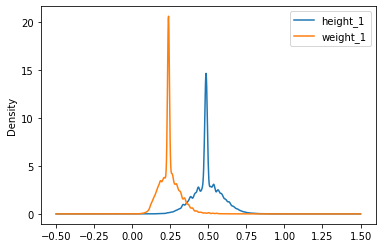

In [ ]:
# Gráfico
df_atleta1_MinMaxScaler.plot(kind = 'kde')

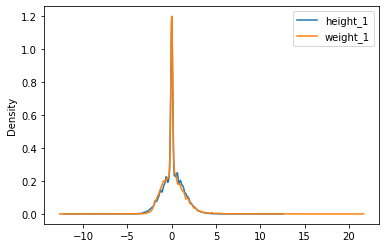

In [ ]:
# RobustScaler (Transformação ideal para dados com outliers)

from sklearn.preprocessing import RobustScaler

# aplicando a transformação RobustScaler => array
A1_RobustScaler = RobustScaler().fit_transform(df_atleta1)

# convertendo array em dataframe:
df_A1_RobustScaler = pd.DataFrame(A1_RobustScaler, columns = ['height_1', 'weight_1'])

# Gráfico
df_A1_RobustScaler.plot(kind = 'kde')

In [ ]:
df_atleta1.describe()

In [ ]:
df_A1_scale.describe()

In [ ]:
df_atleta1.corr()

,height_1,weight_1
height_1,1.000000,0.763795
weight_1,0.763795,1.000000


In [ ]:
df_A1_scale.corr()

,height_1,weight_1
height_1,1.000000,0.763795
weight_1,0.763795,1.000000


In [ ]:
# Calculando outliers em termos de height e weight:

In [ ]:
# calculando outliers em termos de height:

quartiles_height_1 = df_atleta['height_1'].quantile([0.25,0.75]).to_list()

q1_height_1 = quartiles_height_1[0]
q3_height_1 = quartiles_height_1[1]

In [ ]:
# limite superior do outlier:
sup_outlier_height_1 = q3_height_1 + (q3_height_1 - q1_height_1) * 1.5
f'Limite superior do outlier em termos de "height_1":  {sup_outlier_height_1}'


'Limite superior do outlier em termos de "height_1":  195.0'

In [ ]:
# outliers superiores de height_1:
df_atleta_unico[df_atleta_unico['height_1'] > sup_outlier_height_1].sort_values(by= 'height_1', ascending=False).head()

,id,name,sex,team,noc,games,year,season,city,sport,event,age_1,height_1,weight_1,medal_1
265040,132627,Yao Ming,0,China,CHN,2000 Summer,2000,0,Sydney,Basketball,Basketball Men's Basketball,20.0,226.0,141.0,0.0
32376,16639,Tommy Loren Burleson,0,United States,USA,1972 Summer,1972,0,Munich,Basketball,Basketball Men's Basketball,20.0,223.0,102.0,2.0
207373,104059,Arvydas Romas Sabonis,0,Soviet Union,URS,1988 Summer,1988,0,Seoul,Basketball,Basketball Men's Basketball,23.0,223.0,122.0,1.0
59371,30409,Roberto Dueas Hernndez,0,Spain,ESP,2000 Summer,2000,0,Sydney,Basketball,Basketball Men's Basketball,24.0,221.0,137.0,0.0
17669,9407,Gunther Behnke,0,Germany,GER,1992 Summer,1992,0,Barcelona,Basketball,Basketball Men's Basketball,29.0,221.0,114.0,0.0


In [ ]:
df_atleta_unico[df_atleta_unico['height_1'] > sup_outlier_height_1].describe()

,id,sex,year,season,age_1,height_1,weight_1,medal_1
count,3357.000000,3357.000000,3357.000000,3357.000000,3357.000000,3357.000000,3357.000000,3357.000000
mean,69361.352994,0.018469,1995.410188,0.018767,24.212392,200.219541,97.507894,0.470360
std,38992.403848,0.134659,16.640060,0.135720,3.514891,4.517058,13.230210,0.925133
min,62.000000,0.000000,1906.000000,0.000000,16.000000,196.000000,54.000000,0.000000
25%,36349.000000,0.000000,1984.000000,0.000000,22.000000,197.000000,90.000000,0.000000
50%,69873.000000,0.000000,2000.000000,0.000000,24.000000,199.000000,95.000000,0.000000
75%,102948.000000,0.000000,2008.000000,0.000000,26.000000,202.000000,103.000000,0.000000
max,135558.000000,1.000000,2016.000000,1.000000,55.000000,226.000000,198.000000,3.000000


In [ ]:
# limite inferior do outlier:
inf_outlier_height_1 = q1_height_1 - (q3_height_1 - q1_height_1) * 1.5
f'Limite inferior do outlier em termos de "height_1":  {inf_outlier_height_1}'

'Limite inferior do outlier em termos de "height_1":  155.0'

In [ ]:
# outliers inferiores de height:
df_atleta_unico[df_atleta_unico['height_1'] < inf_outlier_height_1].sort_values(by= 'height_1', ascending = True).head()

,id,name,sex,team,noc,games,year,season,city,sport,event,age_1,height_1,weight_1,medal_1
29333,15150,Rosario Briones,1,Mexico,MEX,1968 Summer,1968,0,Mexico City,Gymnastics,Gymnastics Women's Individual All-Around,15.0,127.0,42.0,0.0
164821,82769,Lyton Levison Mphande,0,Malawi,MAW,1988 Summer,1988,0,Seoul,Boxing,Boxing Men's Light-Welterweight,25.0,127.0,62.0,0.0
180615,90772,Helman Palije,0,Malawi,MAW,1988 Summer,1988,0,Seoul,Boxing,Boxing Men's Middleweight,21.0,128.0,74.0,0.0
159934,80255,Salvador Miranda,0,Nicaragua,NCA,1972 Summer,1972,0,Munich,Boxing,Boxing Men's Flyweight,22.0,130.0,51.0,0.0
220270,110638,Boston Simbeye,0,Malawi,MAW,1988 Summer,1988,0,Seoul,Boxing,Boxing Men's Welterweight,28.0,130.0,67.0,0.0


In [ ]:
# outliers em termos de weight:

quartiles_weight_1 = df_atleta['weight_1'].quantile([0.25,0.75]).to_list()

q1_weight_1 = quartiles_weight_1[0]
q3_weight_1 = quartiles_weight_1[1]

In [ ]:
# limite superior do outlier:
sup_outlier_weight_1 = q3_weight_1 + (q3_weight_1 - q1_weight_1) * 1.5
f'Limite superior do outlier em termos de "weight_1":  {sup_outlier_weight_1}'


'Limite superior do outlier em termos de "weight_1":  95.5'

In [ ]:
# outliers superiores de weight_1:
df_atleta_unico[df_atleta_unico['weight_1'] > sup_outlier_weight_1].sort_values(by= 'weight_1', ascending=False).head()

,id,name,sex,team,noc,games,year,season,city,sport,event,age_1,height_1,weight_1,medal_1
23155,12177,"Ricardo Blas, Jr.",0,Guam,GUM,2008 Summer,2008,0,Beijing,Judo,Judo Men's Heavyweight,21.0,183.0,214.0,0.0
205467,103159,Aytami Ruano Vega,0,Spain,ESP,2004 Summer,2004,0,Athina,Judo,Judo Men's Heavyweight,27.0,200.0,198.0,0.0
75031,38075,Marek Galiski,0,Poland,POL,1980 Summer,1980,0,Moskva,Wrestling,"Wrestling Men's Super-Heavyweight, Greco-Roman",29.0,200.0,190.0,0.0
237039,118869,"Christopher J. ""Chris"" Taylor",0,United States,USA,1972 Summer,1972,0,Munich,Wrestling,"Wrestling Men's Super-Heavyweight, Greco-Roman",22.0,196.0,182.0,0.0
206352,103580,Valentyn Rusliakov,0,Ukraine,UKR,2000 Summer,2000,0,Sydney,Judo,Judo Men's Heavyweight,28.0,187.0,180.0,0.0


In [ ]:
# limite inferior do outlier:
inf_outlier_weight_1 = q1_weight_1 - (q3_weight_1 - q1_weight_1) * 1.5
f'Limite inferior do outlier em termos de "weight_1":  {inf_outlier_weight_1}'

'Limite inferior do outlier em termos de "weight_1":  43.5'

In [ ]:
# outliers inferiores de weight:
df_atleta_unico[df_atleta_unico['weight_1']  <inf_outlier_weight_1].sort_values(by= 'weight_1', ascending = True)

,id,name,sex,team,noc,games,year,season,city,sport,event,age_1,height_1,weight_1,medal_1
40849,21049,Choi Myong-Hui,1,North Korea,PRK,1980 Summer,1980,0,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,14.0,135.0,25.0,0.0
256836,128605,Wang Xin (Ruoxue-),1,China,CHN,2008 Summer,2008,0,Beijing,Diving,Diving Women's Platform,15.0,137.0,28.0,3.0
109863,55553,Anita Jokiel,1,Poland,POL,1980 Summer,1980,0,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,13.0,142.0,28.0,0.0
268586,134370,"Albert Ferdinand ""Al"" Zerhusen",0,United States,USA,1956 Summer,1956,0,Melbourne,Football,Football Men's Football,24.0,183.0,28.0,0.0
264539,132383,Kana Yamawaki,1,Japan,JPN,2000 Summer,2000,0,Sydney,Gymnastics,Gymnastics Women's Individual All-Around,16.0,141.0,28.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222569,111813,Olha Mykolavna Skrypak,1,Ukraine,UKR,2012 Summer,2012,0,London,Athletics,"Athletics Women's 10,000 metres",21.0,160.0,43.0,0.0
156182,78434,udmila Melicherov,1,Czechoslovakia,TCH,1988 Summer,1988,0,Seoul,Athletics,Athletics Women's Marathon,24.0,155.0,43.0,0.0
223588,112301,"Jennifer ""Jenny"" Smith",1,Australia,AUS,1996 Summer,1996,0,Atlanta,Gymnastics,Gymnastics Women's Individual All-Around,16.0,149.0,43.0,0.0
76116,38629,Kriscia Lorena Garca Blanco,1,El Salvador,ESA,1984 Summer,1984,0,Los Angeles,Athletics,"Athletics Women's 1,500 metres",20.0,149.0,43.0,0.0


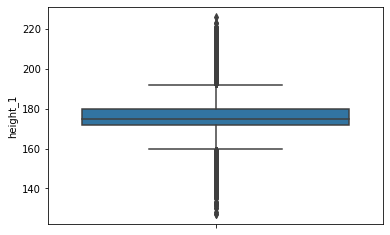

In [ ]:
# Import a biblioteca seaborn:
import seaborn as sns

# Boxplot 'height_1' antes dos "outliers"
sns.boxplot(y = df_atleta1['height_1'])

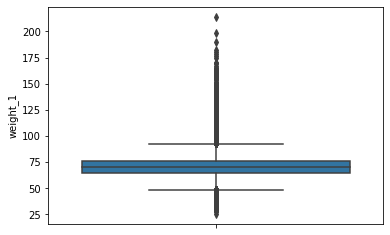

In [ ]:
# Boxplot 'weight' antes dos "outliers"
sns.boxplot(y = df_atleta1['weight_1'])